# 한국복지패널 데이터셋 분석하기

- https://www.koweps.re.kr:442
        
- 우리 나라의 각종 사회조사를 시행하고 데이터를 공개하는 사이트
- SAS라는 통계 분석 프로그램을 사용한 데이터 셋 파일을 제공
    - R로는 이 파일을 함수를 이용해 바로 불러올 수 있으나 Python은 불가능.
    - 예제에서 사용되는 데이터셋은 2017년도 조사 자료를 R에서 Excel형식으로 내보낸 파일임
    - 데이터셋의 각 변수명에 대한 의미는 http://itaper.co.kr/demo/python/codebook-excel.7z 참조

-----------------------
## #01. 필요한 패키지 및 샘플 데이터 가져오기

In [1]:
import numpy
from pandas import DataFrame
from pandas import ExcelFile
from matplotlib import pyplot

In [2]:
# 엑셀 파일을 원격으로 내려받아 데이터프레임으로 변환(다소 시간이 소요된다)
xlsx = ExcelFile("http://itpaper.co.kr/demo/python/dataset2017.xlsx")
df = xlsx.parse(xlsx.sheet_names[0])

In [3]:
df.head()

,h12_id,h12_ind,h12_sn,h12_merkey,h_new,h12_cobf,p12_wgl,p12_wsl,p12_wgc,p12_wsc,...,da12_326,da12_327,da12_328,da12_6aq14,da12_6aq15,h12_pers_income1,h12_pers_income2,h12_pers_income3,h12_pers_income4,h12_pers_income5
0,1,1,1,10101,0,NaN,953.482054,0.286943,948.140524,0.285336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2,1,1,20101,0,NaN,1238.891352,0.372835,1238.891352,0.372835,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,3,1,1,30101,0,NaN,1282.051947,0.385824,1282.051947,0.385824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,4,1,1,40101,0,NaN,1066.327201,0.320903,1066.327201,0.320903,...,NaN,NaN,NaN,NaN,NaN,NaN,3418.0,NaN,0,NaN
4,4,1,1,40101,0,NaN,1390.617192,0.418496,1382.826774,0.416151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


http://itpaper.co.kr/demo/python/dataset2017_fieldname.jpg<br>
http://itpaper.co.kr/demo/python/dataset2017_area.jpg<br>
http://itpaper.co.kr/demo/python/rsample.html


분석예제 1) 조사대상들에 대한 성별 분포

In [4]:
# 데이터프레임 복제
cp=df.copy()
cp

,h12_id,h12_ind,h12_sn,h12_merkey,h_new,h12_cobf,p12_wgl,p12_wsl,p12_wgc,p12_wsc,...,da12_326,da12_327,da12_328,da12_6aq14,da12_6aq15,h12_pers_income1,h12_pers_income2,h12_pers_income3,h12_pers_income4,h12_pers_income5
0,1,1,1,10101,0,NaN,953.482054,0.286943,948.140524,0.285336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2,1,1,20101,0,NaN,1238.891352,0.372835,1238.891352,0.372835,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,3,1,1,30101,0,NaN,1282.051947,0.385824,1282.051947,0.385824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,4,1,1,40101,0,NaN,1066.327201,0.320903,1066.327201,0.320903,...,NaN,NaN,NaN,NaN,NaN,NaN,3418.0,NaN,0,NaN
4,4,1,1,40101,0,NaN,1390.617192,0.418496,1382.826774,0.416151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15417,9800,7,1,98000701,1,NaN,735.488155,0.221339,735.488155,0.221339,...,NaN,NaN,NaN,NaN,NaN,NaN,979.0,NaN,0,NaN
15418,9800,7,1,98000701,1,NaN,898.395613,0.270365,898.395613,0.270365,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
15419,9800,7,1,98000701,1,NaN,2686.353997,0.808438,2676.190322,0.805379,...,NaN,NaN,NaN,NaN,NaN,NaN,868.0,NaN,0,NaN
15420,9800,7,1,98000701,1,NaN,841.651153,0.253288,841.651153,0.253288,...,NaN,NaN,NaN,NaN,NaN,NaN,518.0,NaN,0,NaN


In [5]:
cp_ = cp.filter(['h12_g3','h12_g4','h12_g10','h12_g11','h12_eco9','p1202_8aq1','h12_reg7'])
cp_ = DataFrame(cp_)
cp_

,h12_g3,h12_g4,h12_g10,h12_g11,h12_eco9,p1202_8aq1,h12_reg7
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,NaN,NaN,1
3,1,1942,3,1,762.0,108.9,1
4,2,1923,2,1,NaN,NaN,1
...,...,...,...,...,...,...,...
15417,2,1967,1,1,952.0,NaN,5
15418,2,1992,5,1,NaN,NaN,5
15419,1,1995,5,1,521.0,72.0,5
15420,2,1998,5,1,432.0,NaN,5


In [6]:
cp1 = cp_.filter(['h12_g3'])
cp1 = DataFrame(cp1)
cp1

,h12_g3
0,2
1,2
2,1
3,1
4,2
...,...
15417,2
15418,2
15419,1
15420,2


In [7]:
cp1_=cp1.rename(columns={'h12_g3':'성별'})
cp1_

,성별
0,2
1,2
2,1
3,1
4,2
...,...
15417,2
15418,2
15419,1
15420,2


In [8]:
#성별의 데이터 분포 확인
cp1_['성별'].value_counts()

2    8440
1    6982
Name: 성별, dtype: int64

In [9]:
# 성별값을 반환
cp1_['성별'] = numpy.where(cp1_['성별'] == 1,'남자','여자')
cp1_

,성별
0,여자
1,여자
2,남자
3,남자
4,여자
...,...
15417,여자
15418,여자
15419,남자
15420,여자


In [10]:
# 변환된 값에 의한 성별 데이터 분포를 데이터프레임으로 만들기
vcount = cp1_['성별'].value_counts()
type(vcount)
성별df = DataFrame(vcount)
성별df

,성별
여자,8440
남자,6982


In [11]:
#생성된 데이터 프레임의 컬럼이름 변경
성별df.rename(columns={'성별':'명'}, inplace = True)
성별df

,명
여자,8440
남자,6982


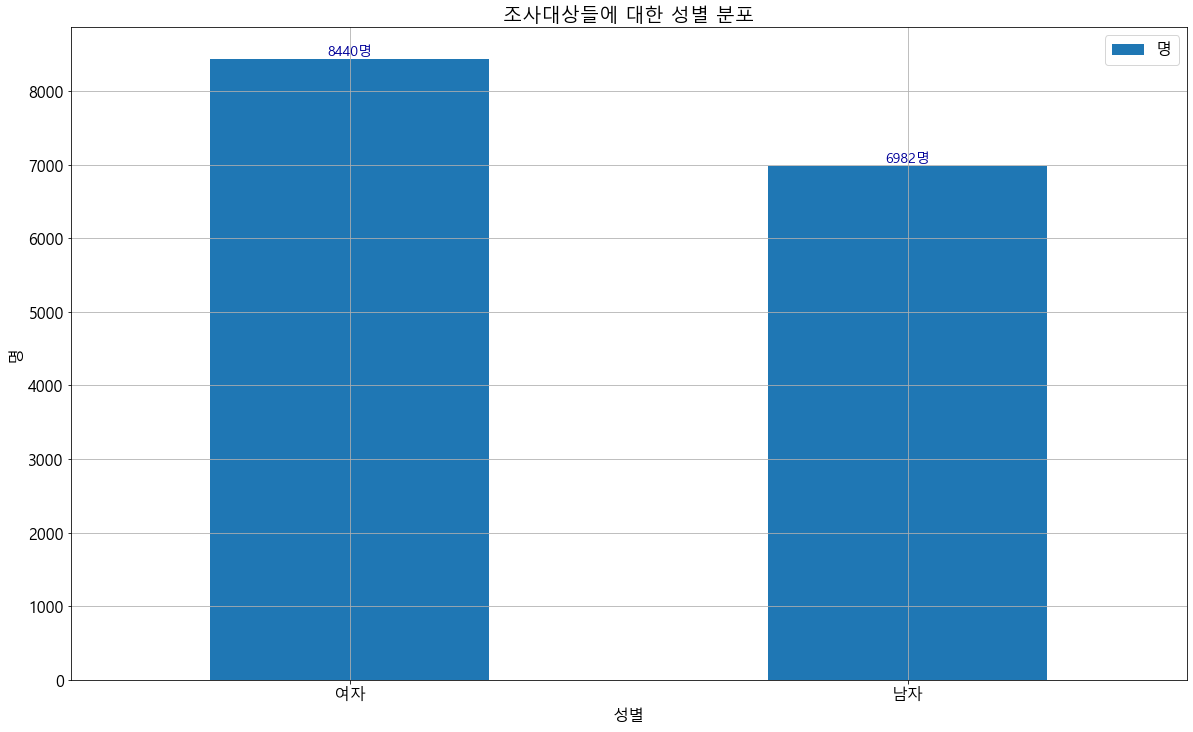

In [12]:
# 한글폰트, 그래픽 크기 설정
pyplot.rcParams["font.family"] = 'Malgun Gothic'
pyplot.rcParams["font.size"] = 16
pyplot.rcParams["figure.figsize"] = (20,12)


성별df.plot.bar(rot=0)
pyplot.grid()
pyplot.legend()
pyplot.title("조사대상들에 대한 성별 분포")
pyplot.xlabel("성별")
pyplot.ylabel("명")

# 그래프에 텍스트 표시하기
for i, v in enumerate(list(성별df['명'])):
    txt = "%d명" % v
    pyplot.text(i,v,txt, fontsize=14, color ='#000099',horizontalalignment='center',verticalalignment='bottom')
pyplot.show()

분석예제 2) 성별에 따른 월급 차이 분석

In [13]:
cp2 = cp_.filter(['h12_g3','p1202_8aq1'])
cp2 = DataFrame(cp2)
cp2

,h12_g3,p1202_8aq1
0,2,NaN
1,2,NaN
2,1,NaN
3,1,108.9
4,2,NaN
...,...,...
15417,2,NaN
15418,2,NaN
15419,1,72.0
15420,2,NaN


In [14]:
cp2_결측치여부 = cp2.isnull()
cp2_결측치여부

,h12_g3,p1202_8aq1
0,False,True
1,False,True
2,False,True
3,False,False
4,False,True
...,...,...
15417,False,True
15418,False,True
15419,False,False
15420,False,True


In [15]:
# 각 열단위로 평균(strategy='mean')을 결측치(missing_values)에 지정
from sklearn.impute import SimpleImputer #sklearn은 tensorflow 보다 수학공식 일일히 안써도 되서 좋다. 그러나 속도가 tensorflow보다 느리다
정제규칙=SimpleImputer(missing_values=numpy.nan, strategy='mean')
정제규칙

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [16]:
정제규칙_적용결과 = 정제규칙.fit_transform(cp2.values)
print(type(정제규칙_적용결과))
정제규칙_적용결과

<class 'numpy.ndarray'>


array([[  2.        , 257.95007322],
       [  2.        , 257.95007322],
       [  1.        , 257.95007322],
       ...,
       [  1.        ,  72.        ],
       [  2.        , 257.95007322],
       [  1.        , 257.95007322]])

In [17]:
cp2_정제결과 = DataFrame(정제규칙_적용결과,index=cp2.index, columns=cp2.columns)
cp2_정제결과

,h12_g3,p1202_8aq1
0,2.0,257.950073
1,2.0,257.950073
2,1.0,257.950073
3,1.0,108.900000
4,2.0,257.950073
...,...,...
15417,2.0,257.950073
15418,2.0,257.950073
15419,1.0,72.000000
15420,2.0,257.950073


In [18]:
분석예제 3) 나이에 따른 월급 평균의 변화

SyntaxError: invalid syntax (<ipython-input-18-5879ecb9fa8f>, line 1)

In [ ]:
cp3 = cp_.filter(['h12_g3','h12_g4','p1202_8aq1'])
cp3 = DataFrame(cp3)
cp3

In [ ]:
cp3=cp3.rename(
    columns={'h12_g3':'성별','h12_g4':'나이','p1202_8aq1':'월급'})
cp3

In [ ]:
cp3_결측치여부 = cp3.isnull()
cp3_결측치여부

In [ ]:
# 각 열단위로 평균(strategy='mean')을 결측치(missing_values)에 지정
from sklearn.impute import SimpleImputer #sklearn은 tensorflow 보다 수학공식 일일히 안써도 되서 좋다. 그러나 속도가 tensorflow보다 느리다
정제규칙=SimpleImputer(missing_values=numpy.nan, strategy='mean')
정제규칙

cp3_정제규칙_적용결과 = 정제규칙.fit_transform(cp3.values)
print(type(cp3_정제규칙_적용결과))
cp3_정제규칙_적용결과

In [ ]:
cp3_정제규칙_적용결과 = 정제규칙.fit_transform(cp3.values)
print(type(cp3_정제규칙_적용결과))
cp3_정제규칙_적용결과

In [ ]:
cp3_정제결과 = DataFrame(cp3_정제규칙_적용결과,index=cp3.index, columns=cp3.columns)
cp3_정제결과

In [ ]:
cp3_정제결과 = cp3_정제결과.filter(['나이','월급'])
cp3_정제결과 = DataFrame(cp3_정제결과)
cp3_정제결과

In [ ]:
# x좌표를 의미할 리스트나 배열 생성
xpos = numpy.arange(len(cp3_정제결과))
xpos


# x좌표에 적용할 텍스트의 리스트 생성
xtext = list(cp3_정제결과.index)
xtext




In [ ]:
# 특정컬럼에 대해서만 시각화 하기
cp3_정제결과.plot(color='#ff0000')
pyplot.grid()
pyplot.legend()
pyplot.title("나이별 급여")
pyplot.xlabel("나이")
pyplot.ylabel("급여")
pyplot.xticks(xpos, xtext)
pyplot.show()

In [ ]:
분석예제 4) 연령대별 월급 평균 분포

In [ ]:
분석예제 5) 연령대와 성별에 따른 월급 평균

In [ ]:
분석예제 6) 지역별 연령대 비율

# <정답>

## 분석예제 1)조사대상들에 대한 성별 분포

In [ ]:
# 성별 컬럼만 추출
df_filter = df.filter(['h12_g3'])
df_filter

In [ ]:
# 성별 변수의 이름을 인식하기 쉬운 값으로 변경하기
df_filter.rename(columns={'h12_g3':'성별'}, inplace=True)
df_filter

In [ ]:
#성별의 데이터 타입 확인
df_filter['성별']

In [ ]:
#결측치 확인
df_filter.isna().sum()

In [ ]:
#성별의 데이터 분포 확인
df_filter['성별'].value_counts()

In [ ]:
# 성별값을 반환
df_filter['성별'] = numpy.where(df_filter['성별'] == 1,'남자','여자')
df_filter

In [ ]:
# 변환된 값에 의한 성별 데이터 분포를 데이터프레임으로 만들기
vcount = df_filter['성별'].value_counts()
type(vcount)
성별df = DataFrame(vcount)
성별df

In [ ]:
#생성된 데이터 프레임의 컬럼이름 변경
성별df.rename(columns={'성별':'명'}, inplace = True)
성별df

In [ ]:
# 비율순으로 정렬
성별df.sort_values('명',inplace=True)
성별df

In [ ]:
# 한글폰트, 그래픽 크기 설정
pyplot.rcParams["font.family"] = 'Malgun Gothic'
pyplot.rcParams["font.size"] = 16
pyplot.rcParams["figure.figsize"] = (20,12)


성별df.plot.bar(rot=0)
pyplot.grid()
pyplot.legend()
pyplot.title("조사대상들에 대한 성별 분포")
pyplot.xlabel("성별")
pyplot.ylabel("명")

# 그래프에 텍스트 표시하기
for i, v in enumerate(list(성별df['명'])):
    txt = "%d명" % v
    pyplot.text(i,v,txt, fontsize=14, color ='#000099',horizontalalignment='center',verticalalignment='bottom')
pyplot.show()

## 분석예제 2)성별에 따른 평균 월급 차이 분석

1단계-변수 검토 및 전처리

In [ ]:
# 성별과 월급 데이터만 추출
df_filter2 = df.filter(['h12_g3','p1202_8aq1'])
df_filter2

In [ ]:
# 변수 이름 변경하기
df_filter2.rename(columns={'h12_g3':'성별','p1202_8aq1':'월급'}, inplace=True)
df_filter2

In [ ]:
# 성별 항목 이름 부여
df_filter2['성별'] = numpy.where(df_filter2['성별'] == 1, '남자','여자')
df_filter2

2단계-데이터분포 확인
- 성별과 같은 문자열(charator) 데이터들은 value_counts()함수를 사용하여 데이터 빈도를 확인
- 월급과 같이 숫자 형식의 연속적 데이터는 describe() 함수로 요약 내용을 확인해야 한다

In [ ]:
df_filter2['성별'].value_counts()

In [ ]:
df_filter2['월급'].describe()

3단계-데이터정제

- 코드표에 의하면 월급 데이터의 경우 1~9998 사이의 값을 갖는다고 되어 있다
- 모름/무응답의 경우 9999로 저장되어 0인 경우는 데이터가 없는 상태이므로 이 두 상태를 이상치로 봐야 한다

In [ ]:
# 이상치 결측 처리
# ---> 0, 9999 둘 중 하나인 값을 결측치로 변경
df_filter2['월급'] = numpy.where(((df_filter2['월급'] < 1) | (df_filter2['월급'] > 9998)), numpy.nan, df_filter2['월급'])
df_filter2

In [ ]:
# 결측치 확인
df_filter2.isna().sum()

In [ ]:
# 결측치가 아닌 데이터만 걸러내기
df_tmp = df_filter2.dropna()
df_tmp

In [ ]:
# 성별로 그룹화 하여 그룹별 평균 구하기
성별_월급_평균표 = df_tmp.groupby('성별').mean()
성별_월급_평균표

4단계 -시각화

수치값을 모두 산정해 놓은 결과를 토대로 그래프를 만드는 경우 평균막대그래프를 사용

In [ ]:
# 한글폰트, 그래픽 크기 설정
pyplot.rcParams["font.family"] = 'Malgun Gothic'
pyplot.rcParams["font.size"] = 16
pyplot.rcParams["figure.figsize"] = (20,12)


성별_월급_평균표.plot.bar(rot=0)
pyplot.grid()
pyplot.legend()
pyplot.title("성별에 따른 평균 월급 차이 분석")
pyplot.xlabel("성별")
pyplot.ylabel("월급")

# 그래프에 텍스트 표시하기
for i, v in enumerate(list(성별_월급_평균표['월급'])):
    txt = "%d만원" % v
    pyplot.text(i,v,txt, fontsize=14, color ='#000099',horizontalalignment='center',verticalalignment='bottom')
pyplot.show()

## 분석예제 3)나이에 따른 월급 평균의 변화

1단계-데이터전처리

In [ ]:
# 태어난 년도, 월급에 대한 컬럼 추출
df_filter3 = df.filter(['h12_g4','p1202_8aq1'])
df_filter3

In [ ]:
# 컬럼이름 변경
df_filter3.rename(columns={'h12_g4':'태어난년도','p1202_8aq1':'월급'}, inplace =True)
df_filter3

나이에 대한 처리<br>
변수 검토하기

In [ ]:
# 결측치 확인
df_filter3['태어난년도'].isna().sum()

파생변수 만들기

In [ ]:
import datetime as dt
yy = dt.datetime.now().year
print(yy)
df_filter3['나이'] = yy - df_filter3['태어난년도'] + 1
df_filter3['나이'].describe()

월급에 대한 데이터 처리

In [ ]:
# 이상치 결측 처리
# ---> 0, 9999 둘 중 하나인 값을 결측치로 변경
df_filter3['월급'] = numpy.where(((df_filter3['월급'] < 1) | (df_filter3['월급'] > 9998)), numpy.nan, df_filter3['월급'])
df_filter3

### 2단계) 나이별 평균 월급 분석

In [ ]:
# 결측치가 아닌 데이터만 걸러내기
df_tmp = df_filter3.dropna() 
df_tmp

In [ ]:
# 나이별로 그룹화하여 그룹별 평균 구하기
나이_월급_평균표 = df_tmp.filter(['나이','월급']).groupby('나이').mean()
나이_월급_평균표

3단계)시각화

In [ ]:
# 한글폰트, 그래픽 크기 설정
pyplot.rcParams["font.family"] = 'Malgun Gothic'
pyplot.rcParams["font.size"] = 18
pyplot.rcParams["figure.figsize"] = (20,10)


나이_월급_평균표.plot()
pyplot.grid()
pyplot.legend()
pyplot.title("연령에 따른 평균 월급 변화")
pyplot.xlabel("나이")
pyplot.ylabel("평균월급")

## 분석예제 4) 연령대별 월급 평균 분포

연령대 분포

In [ ]:
# 태어난 년도 컬럼 추출
df_filter4 = df.filter(['h12_g4'])
df_filter4.rename(columns={'h12_g4':'태어난년도'}, inplace = True)
df_filter4

In [ ]:
df_filter4.isna().sum()

In [ ]:
df_filter4['나이'] = yy - df_filter4['태어난년도'] + 1
df_filter4

In [ ]:
#연령대
df_filter4['연령대'] = (df_filter4['나이'] // 10) * 10
df_filter4

In [ ]:
연령대분포 = DataFrame(df_filter4['연령대'].value_counts())
연령대분포

In [ ]:
연령대분포.sort_index(inplace=True)
연령대분포

In [ ]:
index_after = {}
for i in list(연령대분포.index):
    index_after[i] = '%d대' % i

연령대분포.rename(index=index_after, inplace=True)
연령대분포

In [ ]:
# 한글폰트, 그래픽 크기 설정
pyplot.rcParams["font.family"] = 'Malgun Gothic'
pyplot.rcParams["font.size"] = 18
pyplot.rcParams["figure.figsize"] = (20,10)


연령대분포.plot.bar(rot=0)
pyplot.grid()
pyplot.title("연령대 분포")
pyplot.xlabel("연령대")
pyplot.ylabel("명")

# 그래프에 텍스트 표시하기
for i, v in enumerate(list(연령대분포['연령대'])):
    txt = "%d명" % v
    pyplot.text(i,v,txt, fontsize=14, color ='#000099',horizontalalignment='center',verticalalignment='bottom')
pyplot.show()

연령대별 평균 월급 분포

In [ ]:
# 태어난 년도, 월급 컬럼 추출
df_filter5 = df.filter(['h12_g4','p1202_8aq1'])
df_filter5.rename(columns={'h12_g4':'태어난년도','p1202_8aq1':'월급'},inplace=True)
df_filter5

In [ ]:
df_filter5['나이'] = yy - df_filter5['태어난년도'] + 1
df_filter5

In [ ]:
#연령대
df_filter5['연령대'] = (df_filter5['나이'] // 10)*10
df_filter5.sort_values(['연령대','나이','월급'], inplace = True)
df_filter5

In [ ]:
df_filter5.isna().sum()

In [ ]:
df_filter5.dropna(inplace=True)
df_filter5.isna().sum()

In [ ]:
연령대별_평균급여 = df_filter5.filter(['연령대','월급']).groupby('연령대').mean()
연령대별_평균급여

In [ ]:
# 한글폰트, 그래픽 크기 설정
pyplot.rcParams["font.family"] = 'Malgun Gothic'
pyplot.rcParams["font.size"] = 18
pyplot.rcParams["figure.figsize"] = (20,10)


연령대별_평균급여.plot.bar(rot=0)
pyplot.grid()
pyplot.title("연령대별 평균급여")
pyplot.xlabel("연령대")
pyplot.ylabel("급여")

# 그래프에 텍스트 표시하기
for i, v in enumerate(list(연령대별_평균급여['월급'])):
    print(i)
    txt = "%d만원" % v
    pyplot.text(i,v,txt, fontsize=14, color ='#000099',horizontalalignment='center',verticalalignment='bottom')
pyplot.show()

## 분석예제 5) 연령대와 성별에 따른 월급 평균

성별과 연령대 분포

In [ ]:
# 성별과 태어난년도 데이터 추출
성별_태어난년도 = df.filter(['h12_g3','h12_g4'])
성별_태어난년도.rename(columns={'h12_g3':'성별','h12_g4':'태어난년도'}, inplace=True)
성별_태어난년도

In [ ]:
성별_태어난년도['연령대'] = (yy-성별_태어난년도['태어난년도']+1)//10*10
성별_태어난년도['성별'] = numpy.where(성별_태어난년도['성별'] == 1, '남자','여자')
성별_태어난년도


In [ ]:
연령대_성별_분포 = 성별_태어난년도.groupby(['성별','연령대'], as_index=False).count()
연령대_성별_분포.rename(columns={'태어난년도':'명'}, inplace=True)
연령대_성별_분포

In [ ]:
pivot_df = 연령대_성별_분포.pivot('연령대','성별','명')
pivot_df

In [ ]:
# 한글폰트, 그래픽 크기 설정
pyplot.rcParams["font.family"] = 'Malgun Gothic'
pyplot.rcParams["font.size"] = 18
pyplot.rcParams["figure.figsize"] = (20,10)


pivot_df.plot.bar(rot=0)
pyplot.grid()
pyplot.title("성별과 연령대별 분포")
pyplot.xlabel("연령대")
pyplot.ylabel("명")

pyplot.show()

성별과 연령대에 따른 평균 월급

In [ ]:
# 성별과 태어난년도, 월급 데이터 추출
filter_df = df.filter(['h12_g3','h12_g4','p1202_8aq1'])
filter_df.rename(columns={'h12_g3':'성별','h12_g4':'태어난년도','p1202_8aq1':'월급'},inplace=True)
filter_df

In [ ]:
filter_df['연령대'] = (yy-filter_df['태어난년도']+1)//10*10
filter_df['성별'] = numpy.where(filter_df['성별'] == 1, '남자','여자')
filter_df.drop('태어난년도', axis =1, inplace=True)
filter_df.dropna(inplace=True)
filter_df

In [ ]:
성별_연령대별_평균월급 = filter_df.groupby(['성별','연령대'], as_index=False).mean()
성별_연령대별_평균월급

In [ ]:
pivot_df = 성별_연령대별_평균월급.pivot('연령대','성별','월급')
pivot_df

In [ ]:
# 한글폰트, 그래픽 크기 설정
pyplot.rcParams["font.family"] = 'Malgun Gothic'
pyplot.rcParams["font.size"] = 18
pyplot.rcParams["figure.figsize"] = (20,10)


pivot_df.plot.bar(rot=0)
pyplot.grid()
pyplot.title("성별 연령대에 따른 평균 급여")
pyplot.xlabel("연령대")
pyplot.ylabel("급여(만원)")

pyplot.show()

In [ ]:
## 분석예제 6) 지역별 연령대 비율

In [19]:
# 성별과 태어난년도 데이터 추출
지역년도 = df.filter(['h12_g4','h12_reg7'])
지역년도df = 지역년도.rename(columns={'h12_g4':'태어난년도','h12_reg7':'지역코드'})
지역년도df

,태어난년도,지역코드
0,1936,1
1,1945,1
2,1948,1
3,1942,1
4,1923,1
...,...,...
15417,1967,5
15418,1992,5
15419,1995,5
15420,1998,5


In [23]:
#년도에 대한 무응답 데이터 여부 확인
지역년도df.query('태어난년도 >= 9999')

,태어난년도,지역코드


In [25]:
#결측치 확인
지역년도df.isna().sum()

태어난년도    0
지역코드     0
dtype: int64

In [33]:
#나이변수 추가
import datetime as dt
지역년도df['나이'] = dt.datetime.now().year - 지역년도df['태어난년도']+1
지역년도df

,태어난년도,지역코드,나이
0,1936,1,84
1,1945,1,75
2,1948,1,72
3,1942,1,78
4,1923,1,97
...,...,...,...
15417,1967,5,53
15418,1992,5,28
15419,1995,5,25
15420,1998,5,22


In [34]:
# 지역코드표 만들기
지역코드표df = DataFrame({'지역코드' :list(range(1,8)),'지역':['서울','인천,경기','부산,경남,울산','대구,경북','대전,충남','강원,충북','광주,전남,전북,제주']})
지역코드표df

,지역코드,지역
0,1,서울
1,2,"인천,경기"
2,3,"부산,경남,울산"
3,4,"대구,경북"
4,5,"대전,충남"
5,6,"강원,충북"
6,7,"광주,전남,전북,제주"


In [53]:
import pandas as pd
지역나이df = pd.merge(지역년도df,지역코드표df, how = 'outer')
지역나이df

,태어난년도,지역코드,나이,지역
0,1936,1,84,서울
1,1945,1,75,서울
2,1948,1,72,서울
3,1942,1,78,서울
4,1923,1,97,서울
...,...,...,...,...
15417,2003,3,17,"부산,경남,울산"
15418,2006,3,14,"부산,경남,울산"
15419,1984,3,36,"부산,경남,울산"
15420,1984,3,36,"부산,경남,울산"


In [60]:
# 연령층을 구분하기 위한 나이의 구간을 설정하는 조건들을 리스트로 설정
conditions = [(지역나이df['나이'] < 30), (지역나이df['나이'] < 60), (지역나이df['나이'] >= 60)]

# 조건에 따라 부여될 값
level = ['청년층','중년층','노년층']

#조건에 따른 연령층 추가하기
지역나이df['연령층'] = numpy.select(conditions, level)
지역나이df

,태어난년도,지역코드,나이,지역,연령층
0,1936,1,84,서울,노년층
1,1945,1,75,서울,노년층
2,1948,1,72,서울,노년층
3,1942,1,78,서울,노년층
4,1923,1,97,서울,노년층
...,...,...,...,...,...
15417,2003,3,17,"부산,경남,울산",청년층
15418,2006,3,14,"부산,경남,울산",청년층
15419,1984,3,36,"부산,경남,울산",중년층
15420,1984,3,36,"부산,경남,울산",중년층


In [61]:
# 그룹조회(확인용)
tmp = 지역나이df.filter(['지역','연령층','나이']).groupby(['지역','연령층']).count()
tmp

나이
지역          연령층      
강원,충북       노년층   554
            중년층   365
            청년층   261
광주,전남,전북,제주 노년층  1258
            중년층   870
            청년층   621
대구,경북       노년층   947
            중년층   551
            청년층   376
대전,충남       노년층   573
            중년층   451
            청년층   331
부산,경남,울산    노년층  1155
            중년층   850
            청년층   559
서울          노년층   824
            중년층   872
            청년층   512
인천,경기       노년층  1180
            중년층  1333
            청년층   979

In [63]:
지역별연령층df = 지역나이df.filter(['지역','연령층','나이']).groupby(['지역','연령층'], as_index=False).count()
지역별연령층df

,지역,연령층,나이
0,"강원,충북",노년층,554
1,"강원,충북",중년층,365
2,"강원,충북",청년층,261
3,"광주,전남,전북,제주",노년층,1258
4,"광주,전남,전북,제주",중년층,870
5,"광주,전남,전북,제주",청년층,621
6,"대구,경북",노년층,947
7,"대구,경북",중년층,551
8,"대구,경북",청년층,376
9,"대전,충남",노년층,573


In [69]:
지역별연령층df.rename(columns={'나이':'조사인원'}, inplace=True)
지역별연령층df

,지역,연령층,조사인원
0,"강원,충북",노년층,554
1,"강원,충북",중년층,365
2,"강원,충북",청년층,261
3,"광주,전남,전북,제주",노년층,1258
4,"광주,전남,전북,제주",중년층,870
5,"광주,전남,전북,제주",청년층,621
6,"대구,경북",노년층,947
7,"대구,경북",중년층,551
8,"대구,경북",청년층,376
9,"대전,충남",노년층,573


In [75]:
지역별연령층pv = 지역별연령층df.pivot('지역','연령층','조사인원')
지역별연령층pv

연령층,노년층,중년층,청년층
지역,,,
"강원,충북",554,365,261
"광주,전남,전북,제주",1258,870,621
"대구,경북",947,551,376
"대전,충남",573,451,331
"부산,경남,울산",1155,850,559
서울,824,872,512
"인천,경기",1180,1333,979


In [77]:
지역별연령층pv = 지역별연령층pv.reindex(columns=['청년층','중년층','노년층'])
지역별연령층pv

연령층,청년층,중년층,노년층
지역,,,
"강원,충북",261,365,554
"광주,전남,전북,제주",621,870,1258
"대구,경북",376,551,947
"대전,충남",331,451,573
"부산,경남,울산",559,850,1155
서울,512,872,824
"인천,경기",979,1333,1180


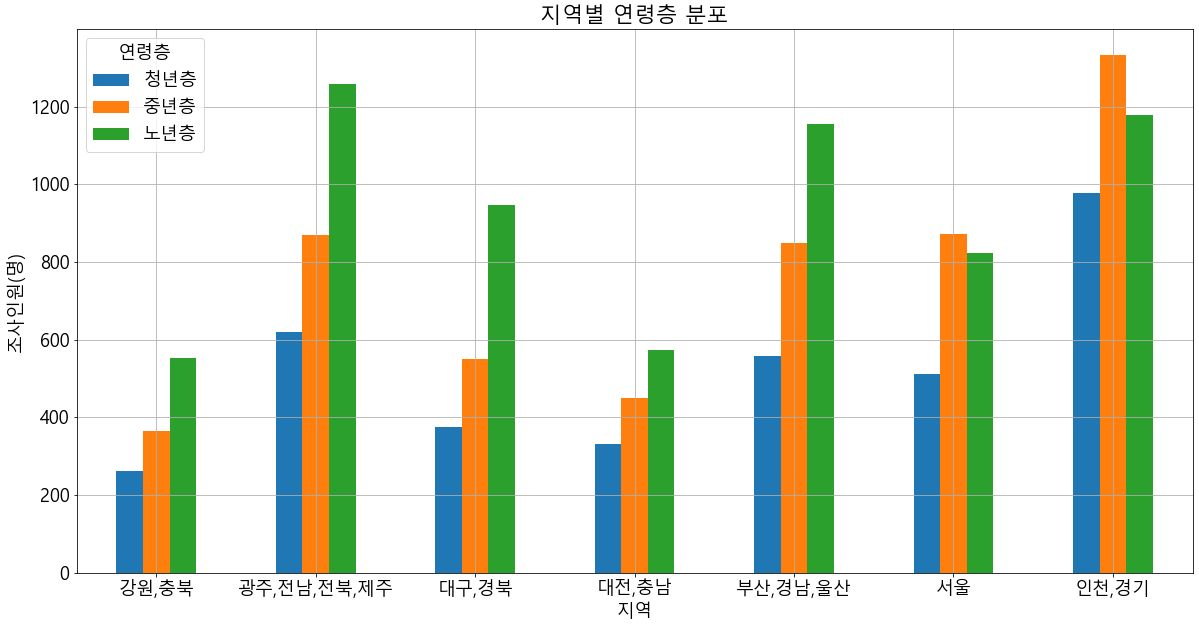

In [78]:
# 한글폰트, 그래픽 크기 설정
pyplot.rcParams["font.family"] = 'Malgun Gothic'
pyplot.rcParams["font.size"] = 18
pyplot.rcParams["figure.figsize"] = (20,10)

지역별연령층pv.plot.bar(rot=0)
pyplot.title("지역별 연령층 분포")
pyplot.grid()
pyplot.xlabel("지역")
pyplot.ylabel("조사인원(명)")

pyplot.show()
